In [1]:
import numpy as np
import random
import os

twopi = 2.*np.pi
oneOver2Pi = 1./twopi

In [2]:
#
# Processing parameters
#
run = "xmelt_test"
in_dir = "/home/walterms/project/walterms/mcmd/nn/data/scratch/xmelt/raw/"
trn_dir = "/home/walterms/project/walterms/mcmd/nn/data/train/"
test_dir = "/home/walterms/project/walterms/mcmd/nn/data/test/"
unlabeled_dir = "/home/walterms/project/walterms/mcmd/nn/data/scratch/xmelt/processed/"

# For trnfnames, dict of run: label
# [iso, D, T, X, U, L]
# trnfnames = {run: 1}
unlblfnames = os.listdir(in_dir)

# nbl parameters
# Use -1 to mean all
nblSkip = 1 # Skip first few images
nblPerTrnFile = -1
nblTrn2Test = 0 # How many train blocks channelled to test
nblUnlbl = -1 

In [13]:
unlblfnames = os.listdir(in_dir)

In [3]:
nblList = {}
for f in unlblfnames:
    nblList.update({f:20001})

In [4]:
for f in unlblfnames:
    nbl = 0
    print "processing " + f + " for unlabeled data"
    try:
        fin = open(in_dir+f, 'r')
    except:
        print "Couldn't open "+f
        continue
    fout = open(unlabeled_dir+f, 'w')
    
    # find width from file header
    width, height = 0., 0.
    l = fin.readline().split("|")
    for ll in l:
        if "boxEdge" in ll:
            width = float(ll.split()[1])
    height = width
    fin.seek(0)

    if width == 0.:
        # calculate edge length based on vertices of first block
        block = []
        for line in fin.readlines():
            if line == "\n": break
            if line[0].isalpha(): continue
            block.append(line)
        fin.seek(0)
        width, xheight = edgeLenCalc(block)

    fin.seek(0)
    fin.readline()
        
    normX, normY = 1./width, 1./height # normalize x and y
    # Initially, theta=[0,2pi]
    thNorm = oneOver2Pi

    
    # Set up the dict for initial thetas
    thdict = {}
    # For example, imagine th = [-1,1], we are concerned with cases where
    # +1 <-> -1, but not +0.1 <-> -0.1, but these look the same if we
    # are only looking at the sign. Let's say that if |dtheta| for a time step is 
    # greater than ~1, then it crossed the boundary
    # Let the dict just keep track of each theta
    for line in fin.readlines():
        if line == "\n": break
        spt = [float(x) for x in line.split()]
        th,ID = spt[4],int(spt[0])
        thdict.update({ID:th})
    fin.seek(0)
    fin.readline()

    thtrack = []
    trackID = 9
    thmax, thmin = [],[] #[ID,value,x,y]
    thmax_bl,thmin_bl = [0.,0.,0.,0.],[0.,0.,0.,0.]
    thmaxval,thminval = 0.,0.
    
    # adjust nblunlbl if needed
    if nblUnlbl == -1:
        nblUnlbl = nblList[f]
    for line in fin.readlines():
        if nbl < nblSkip:
            if line == "\n":
                nbl += 1
            continue
        if line == "\n":
            fout.write("\n")
            thmax.append(thmax_bl)
            thmin.append(thmin_bl)
            nbl+=1
            continue
        spt = [float(x) for x in line.split()]
        x,y,th,ID = spt[2],spt[3],spt[4],int(spt[0])
        x *= normX
        y *= normY
        
        if (np.fabs(th-thdict[ID]) > twopi/2.):
            if thdict[ID]>twopi/2.: th += twopi
            else: th -= twopi
        thdict[ID] = th
        
        th *= oneOver2Pi
        if ID == trackID: thtrack.append(th)
            
        if th > thmaxval: 
            thmaxval = th
            thmax_bl = [ID,th,x,y]
        if th < thminval: 
            thminval = th
            thmin_bl = [ID,th,x,y]
        
        fout.write('%f %f %f %f\n' % (x, y, th, ID))
    fout.close()
    fin.close()
print "Done"

processing xmelt_164 for unlabeled data
processing xmelt_189 for unlabeled data
processing xmelt_73 for unlabeled data
processing xmelt_25 for unlabeled data
processing xmelt_11 for unlabeled data
processing xmelt_5 for unlabeled data
processing xmelt_99 for unlabeled data
processing xmelt_144 for unlabeled data
processing xmelt_96 for unlabeled data
processing xmelt_199 for unlabeled data
processing xmelt_104 for unlabeled data
processing xmelt_153 for unlabeled data
processing xmelt_74 for unlabeled data
processing xmelt_198 for unlabeled data
processing xmelt_151 for unlabeled data
processing xmelt_9 for unlabeled data
processing xmelt_91 for unlabeled data
processing xmelt_143 for unlabeled data
processing xmelt_34 for unlabeled data
processing xmelt_131 for unlabeled data
processing xmelt_158 for unlabeled data
processing xmelt_14 for unlabeled data
processing xmelt_128 for unlabeled data
processing xmelt_113 for unlabeled data
processing xmelt_140 for unlabeled data
processing xm

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
thing = list(thmax)
ys = np.zeros((len(thing),4))
for i in range(len(thing)):
    ys[i,0] = thing[i][0]
    ys[i,1] = thing[i][1]
    ys[i,2] = thing[i][2]
    ys[i,3] = thing[i][3]

In [28]:
len(thmax)

10000

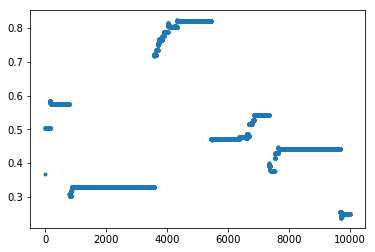

In [38]:
plt.plot(ys[:,3],'.')